In [474]:
import pandas as pd
import seaborn as sns

url = 'marketing_customer_analysis_clean.csv'
df = pd.read_csv(url)

In [475]:
numericals_df = df.select_dtypes(include='number')

In [476]:
numericals_df

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2
1,1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1
2,2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2
3,3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1
4,4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645,1
...,...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,15.149071,40,0.384256,7,1214.400000,1
10906,10906,5259.444853,61146,65,7.000000,68,0.000000,6,273.018929,1
10907,10907,23893.304100,39837,201,11.000000,63,0.000000,2,381.306996,2
10908,10908,11971.977650,64195,158,0.000000,27,4.000000,6,618.288849,2


In [477]:
# Drop NAN and duplicates
numericals_df = numericals_df.dropna()
numericals_df = numericals_df.drop_duplicates()

### X-y Splitt

In [478]:
numericals_df.columns

Index(['unnamed:_0', 'customer_lifetime_value', 'income',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'total_claim_amount', 'month'],
      dtype='object')

In [479]:
X = numericals_df[['customer_lifetime_value', 'income',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'month']]
y = numericals_df[['total_claim_amount']]

### Train test split

In [480]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 42)

### Standardize the data (after the data split!)

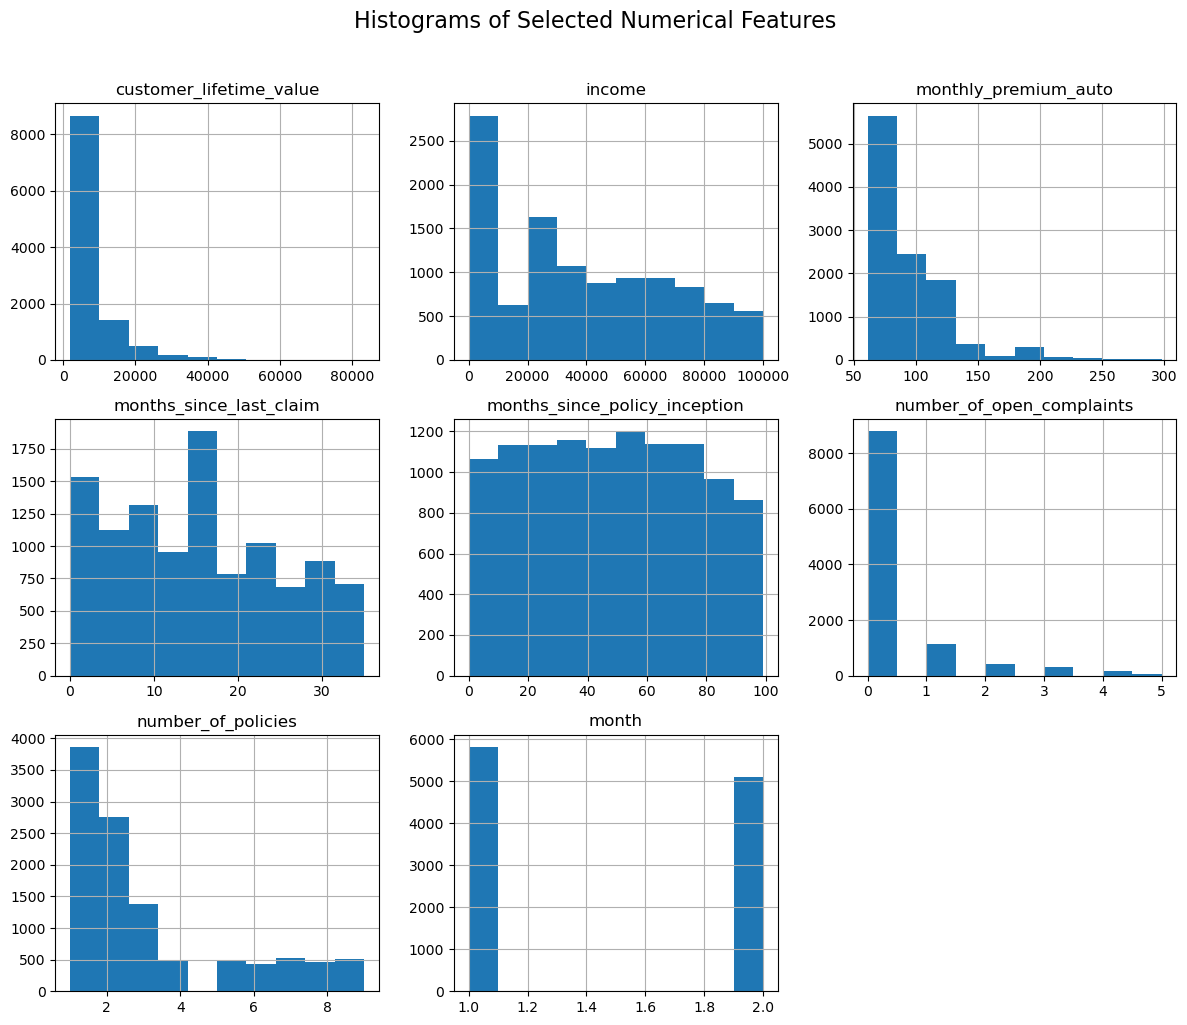

In [481]:
# Look at the histograms of the individual columns to decide which column should be transformed.

import matplotlib.pyplot as plt
import math

# Assuming 'numericals_df' is your DataFrame with numerical features
# Replace it with your actual DataFrame

selected_columns = X.columns

# Calculate the required layout size
n_cols = len(selected_columns)
cols_per_row = 3
n_rows = math.ceil(n_cols / cols_per_row)

# Display histograms for specific numerical columns
X[selected_columns].hist(bins=10, figsize=(12, 10), layout=(n_rows, cols_per_row), sharex=False)
plt.suptitle('Histograms of Selected Numerical Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

In [482]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

<Axes: >

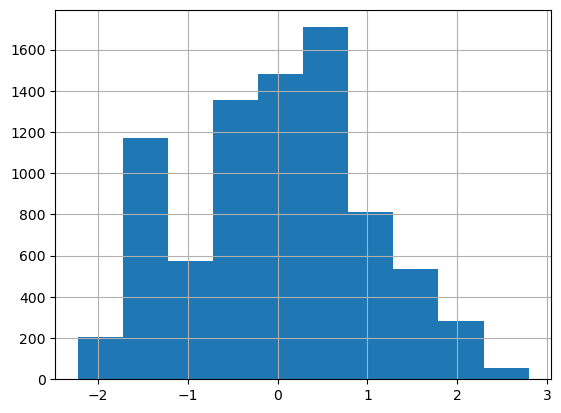

In [483]:
#PowerTransform X_train
pt1 = PowerTransformer()
X_train['customer_lifetime_value'] = pt1.fit_transform(X_train[['customer_lifetime_value']])
X_train['customer_lifetime_value'].hist()

<Axes: >

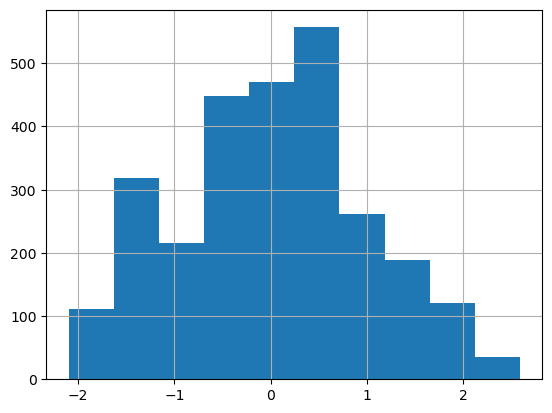

In [484]:
#PowerTransform X_test
X_test['customer_lifetime_value'] = pt1.transform(X_test[['customer_lifetime_value']])
X_test['customer_lifetime_value'].hist()

<Axes: >

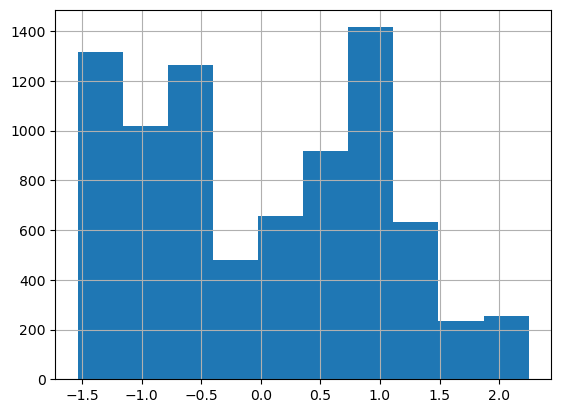

In [485]:
#PowerTransform X_train
pt2 = PowerTransformer()
X_train['monthly_premium_auto'] = pt2.fit_transform(X_train[['monthly_premium_auto']])
X_train['monthly_premium_auto'].hist()

<Axes: >

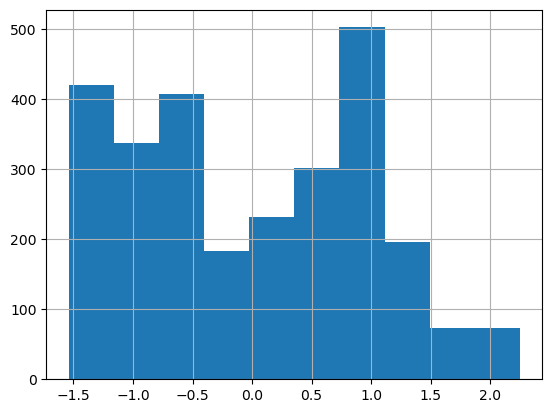

In [486]:
#PowerTransform X_test
X_test['monthly_premium_auto'] = pt2.transform(X_test[['monthly_premium_auto']])
X_test['monthly_premium_auto'].hist()

<Axes: >

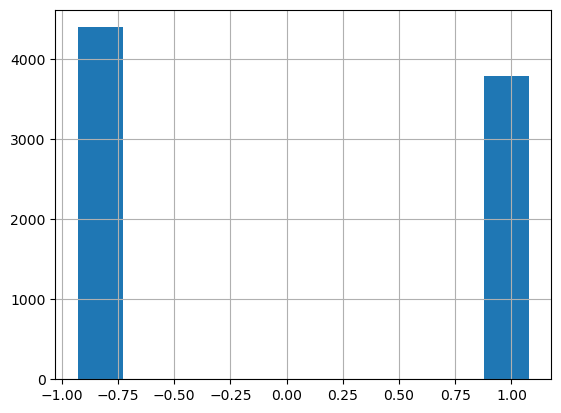

In [487]:
#PowerTransform X_train
pt3 = PowerTransformer()
X_train['month'] = pt3.fit_transform(X_train[['month']])
X_train['month'].hist()

<Axes: >

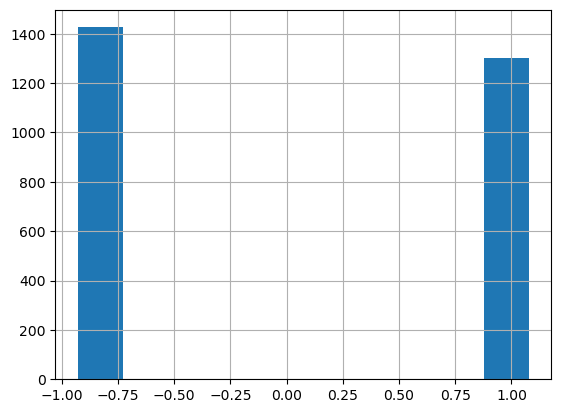

In [488]:
#PowerTransform X_test
X_test['month'] = pt3.transform(X_test[['month']])
X_test['month'].hist()

<Axes: >

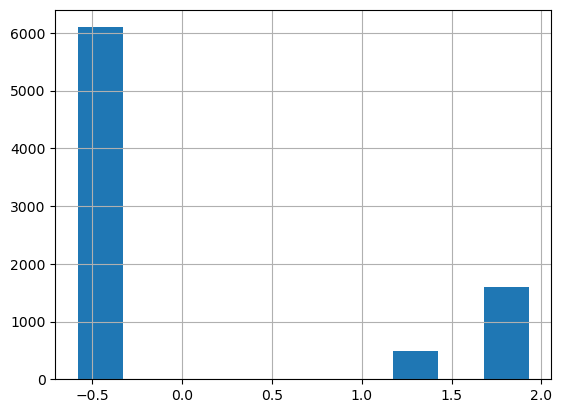

In [489]:
#PowerTransform X_train
pt4 = PowerTransformer()
X_train['number_of_open_complaints'] = pt4.fit_transform(X_train[['number_of_open_complaints']])
X_train['number_of_open_complaints'].hist()

<Axes: >

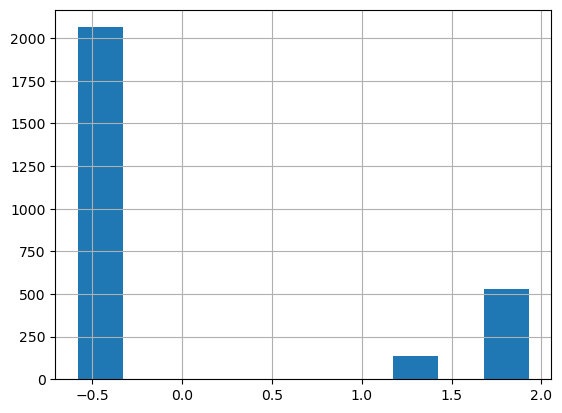

In [490]:
#PowerTransform X_test
X_test['number_of_open_complaints'] = pt4.transform(X_test[['number_of_open_complaints']])
X_test['number_of_open_complaints'].hist()

<Axes: >

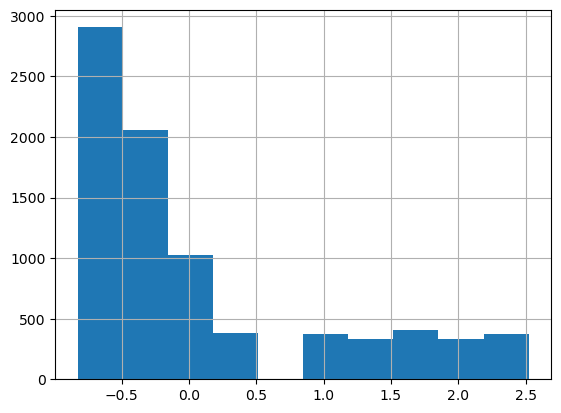

In [491]:
# StandardScaler X_train
scaler = StandardScaler()
standardScaled_number_of_policies = scaler.fit_transform(X_train[['number_of_policies']])
X_train['number_of_policies'] = standardScaled_number_of_policies
X_train['number_of_policies'].hist()

<Axes: >

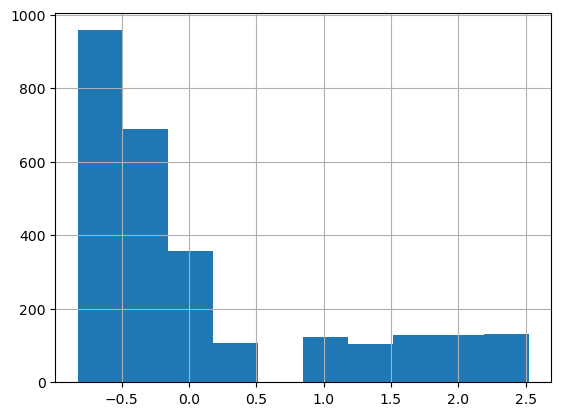

In [492]:
# StandardScaler X_test
standardScaled_number_of_policies = scaler.transform(X_test[['number_of_policies']])
X_test['number_of_policies'] = standardScaled_number_of_policies
X_test['number_of_policies'].hist()

<Axes: >

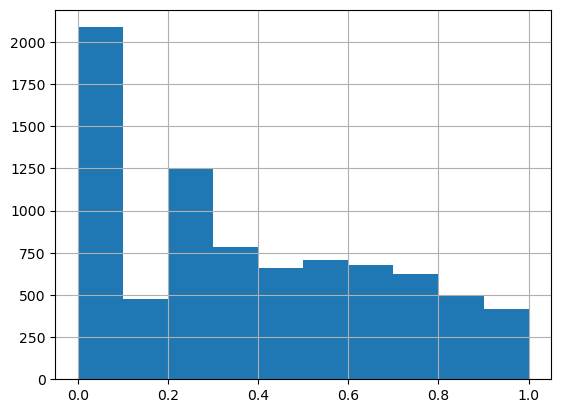

In [493]:
# MinMaxScaler X_train
scaler1 = MinMaxScaler()
income_MM = scaler1.fit_transform(X_train[['income']])
X_train['income'] = income_MM
X_train['income'].hist()

<Axes: >

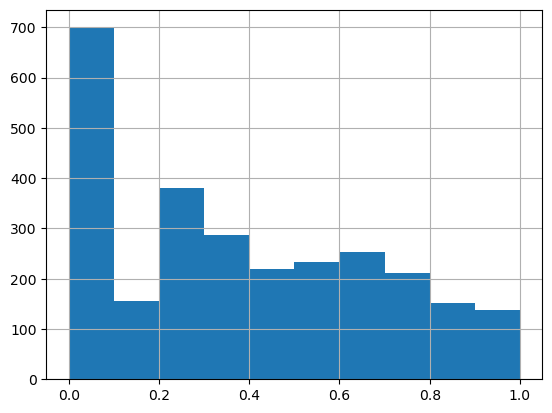

In [494]:
# MinMaxScaler X_test
income_MM = scaler1.transform(X_test[['income']])
X_test['income'] = income_MM
X_test['income'].hist()

<Axes: >

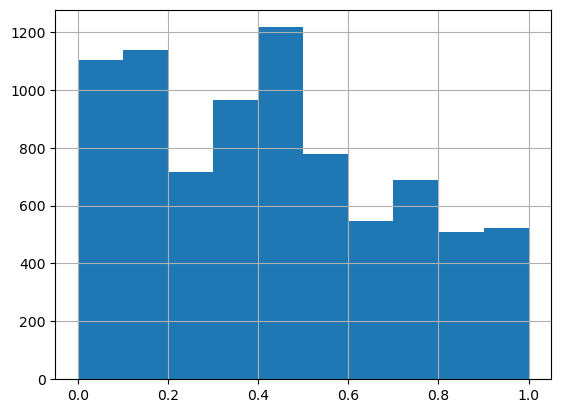

In [495]:
# MinMaxScaler X_train
scaler2 = MinMaxScaler()
months_since_last_claim_MM = scaler2.fit_transform(X_train[['months_since_last_claim']])
X_train['months_since_last_claim'] = months_since_last_claim_MM
X_train['months_since_last_claim'].hist()

<Axes: >

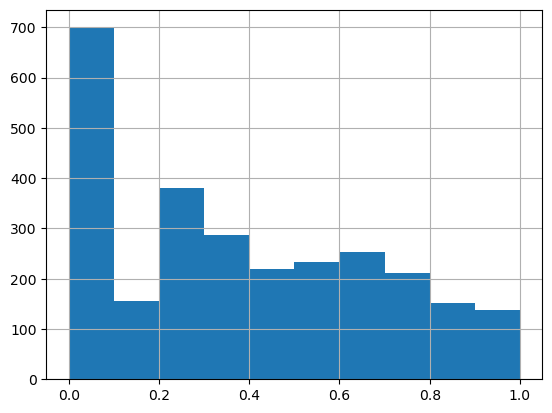

In [496]:
# MinMaxScaler X_test
months_since_last_claim_MM = scaler2.transform(X_test[['months_since_last_claim']])
X_test['months_since_last_claim'] = income_MM
X_test['months_since_last_claim'].hist()

<Axes: >

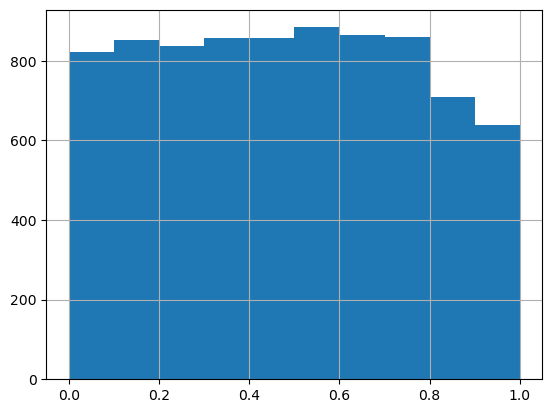

In [497]:
# MinMaxScaler X_train
scaler3 = MinMaxScaler()
months_since_policy_inception_MM = scaler3.fit_transform(X_train[['months_since_policy_inception']])
X_train['months_since_policy_inception'] = months_since_policy_inception_MM
X_train['months_since_policy_inception'].hist()

<Axes: >

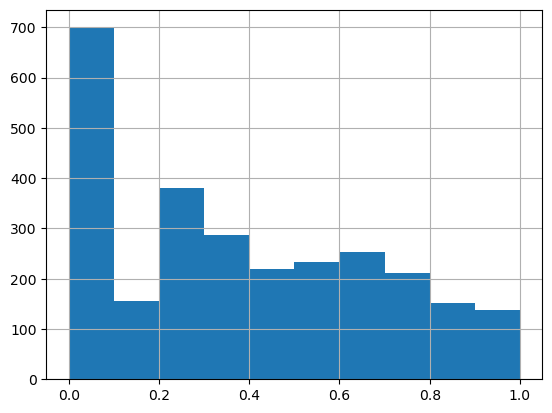

In [498]:
# MinMaxScaler X_test
months_since_policy_inception_MM = scaler3.transform(X_test[['months_since_policy_inception']])
X_test['months_since_policy_inception'] = income_MM
X_test['months_since_policy_inception'].hist()

### Apply linear regression

In [499]:
from sklearn.linear_model import LinearRegression
ln = LinearRegression()
model = ln.fit(X_train, y_train)

In [500]:
model.coef_

array([[   6.03778673, -334.51400373,  156.28896134,    9.57398458,
         -12.95512776,   -1.30620949,   -2.17075764,   -0.91370555]])

In [501]:
model.intercept_

array([562.2440011])

### Predict mass of random total_claim_amount

In [502]:
random_total_claim_amount = X_test.sample()

In [503]:
random_total_claim_amount

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month
8483,0.941297,0.654604,0.435447,0.654604,0.654604,-0.579873,-0.406324,-0.928942


In [504]:
model.predict(random_total_claim_amount)

array([[417.28355259]])

### Create predictions for the test set

In [505]:
y_pred = model.predict(X_test)

In [506]:
y_pred = pd.DataFrame(y_pred)

In [507]:
y_test = y_test.reset_index(drop=True)

In [508]:
residuals_df = pd.concat([y_test,y_pred], axis=1)

In [509]:
residuals_df = pd.concat([y_test,y_pred], axis=1)

In [510]:
residuals_df

,total_claim_amount,0
0,475.423848,139.659150
1,350.400000,356.168681
2,482.400000,392.987225
3,673.342650,474.812156
4,302.400000,125.090695
...,...,...
2723,460.266881,579.523958
2724,405.883346,300.644958
2725,41.182611,240.828857
2726,364.800000,508.296505


In [511]:
residuals_df = residuals_df.rename(columns={'total_claim_amount': 'y_test',0: 'y_pred'})

In [512]:
residuals_df['residual'] = residuals_df['y_test'] - residuals_df['y_pred']

In [513]:
residuals_df

,y_test,y_pred,residual
0,475.423848,139.659150,335.764698
1,350.400000,356.168681,-5.768681
2,482.400000,392.987225,89.412775
3,673.342650,474.812156,198.530494
4,302.400000,125.090695,177.309305
...,...,...,...
2723,460.266881,579.523958,-119.257077
2724,405.883346,300.644958,105.238388
2725,41.182611,240.828857,-199.646246
2726,364.800000,508.296505,-143.496505


### Calculating metrics

In [514]:
mean_error = residuals_df['residual'].mean()
mean_error

0.20638978105273942

In [515]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae
mse(y_test, y_pred)

47092.11779623405

In [516]:
import numpy as np
np.sqrt(mse(y_test, y_pred))

217.00718374338223

In [517]:
rmse = mse(y_test, y_pred, squared=False)
rmse

217.00718374338223

### Computing R2_score for test_set

In [518]:
from sklearn.metrics import r2_score
r2_test = round(r2_score(y_test, y_pred), 2)
r2_test

0.43

### Computing R2_score for train_set

In [519]:
y_pred_train = pd.DataFrame(model.predict(X_train))
r2_train = round(r2_score(y_train, y_pred_train), 2)
r2_train

0.42

### Test

In [520]:
features_names = list(X_train.columns)
features_names

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'month']

In [521]:
coefficients = model.coef_
coefficients = [i for i in coefficients[0]]

In [522]:
fi_dict = {'name':features_names, 'coeff':coefficients}
fi_df = pd.DataFrame(fi_dict)
fi_df

,name,coeff
0,customer_lifetime_value,6.037787
1,income,-334.514004
2,monthly_premium_auto,156.288961
3,months_since_last_claim,9.573985
4,months_since_policy_inception,-12.955128
5,number_of_open_complaints,-1.306209
6,number_of_policies,-2.170758
7,month,-0.913706


<Axes: xlabel='coeff', ylabel='name'>

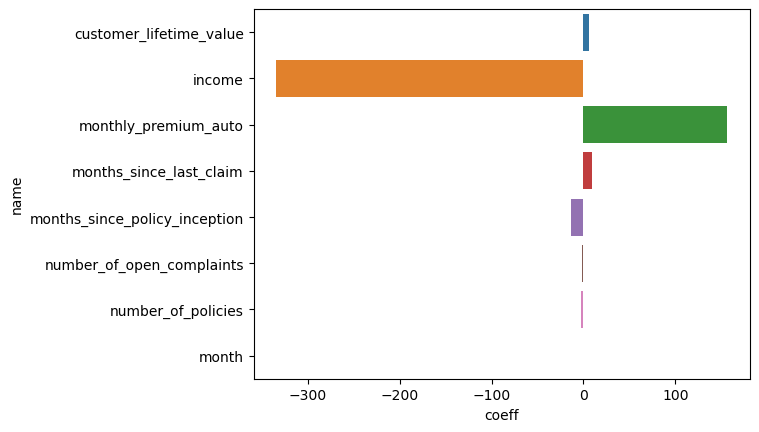

In [523]:
sns.barplot(y= fi_df['name'], x = fi_df['coeff'])